In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import os
from scipy.linalg import block_diag
from PO.utils import make_diagonalizable_matrix, make_positive_semidefinite, plot_loss, plot_loss_sliding, compare_losses, make_diagonalizable_matrix_complex, get_hankel_new, run_multiple_runs, plot_runs_with_mean

# PARTIAL OBSERVATIONS:
from PO.LQG.lqg import LQG  # new updated
from PO.GRC.grc import GRC # new updated
from PO.GRC.grc_STU import GRC_STU # new updated
# from PO.GRC.grc_new import ModifiedGRC # new updated
from PO.DSC.dsc_PO import DSC_PO # new updated
from PO.DSC.dsc_PO_STU import DSC_PO_STU # new updated
# from PO.DOSC.dosc_PO_old import DOSC_PO_old # new updated

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

LQG Model Runtime: 0.2448 seconds
LQG NL Model Runtime: 0.2527 seconds


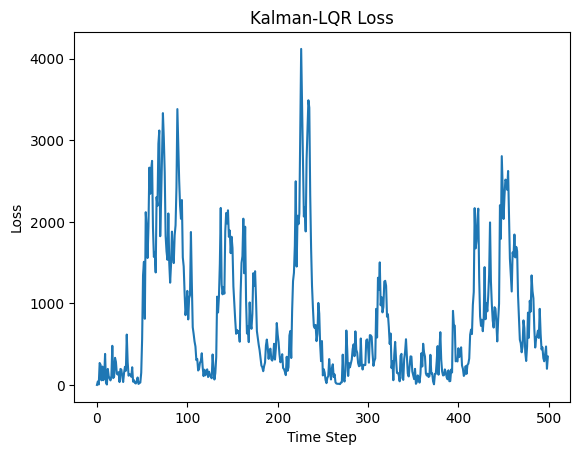

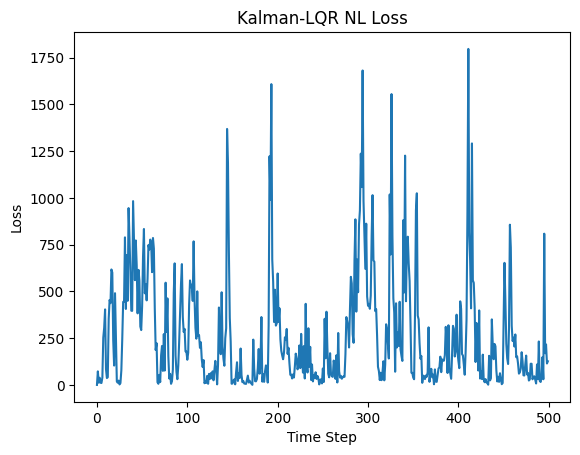

In [8]:
# LQG PO Experiments 

# Define system parameters
d, n = 10, 4  # Example dimensions
A = make_diagonalizable_matrix(d)
C = make_diagonalizable_matrix(d) 
B = np.random.randn(d, n)
Q = make_positive_semidefinite(d) 
R = make_positive_semidefinite(n)

# Create noise covariance matrices for Kalman filter
Q_noise = 0.9 * np.eye(d)           # Process noise
R_noise = 0.9 * np.eye(C.shape[0])  # Measurement noise


# PARAMETERS
h = 5         # Number of eigenpairs
eta =  0.001  # Step size
T = 500


lqg_po = LQG(A, B, C, Q, Q_noise, R, R_noise, h, eta, T, name="LQG", nl=False)
lqg_po_nl = LQG(A, B, C, Q, Q_noise, R, R_noise, h, eta, T, name="LQG", nl=True)
# grc_po_nl = GRC(A, B, C, Q, R, h, eta, T, name="GRC", nl=True)
# grc_po_stu = GRC_STU(A, B, C, Q, R, h, eta, T, name="GRC", nl=True)


start_time = time.time()
lqg_po.run()
end_time = time.time()
print(f"LQG Model Runtime: {end_time - start_time:.4f} seconds")

start_time = time.time()
lqg_po_nl.run()
end_time = time.time()
print(f"LQG NL Model Runtime: {end_time - start_time:.4f} seconds")

# start_time = time.time()
# grc_po_nl.run()
# end_time = time.time()
# print(f"GRC NL Model Runtime: {end_time - start_time:.4f} seconds")

# start_time = time.time()
# grc_po_stu.run()
# end_time = time.time()
# print(f"GRC STU Model Runtime: {end_time - start_time:.4f} seconds")

# # OSC_NL
# start_time = time.time()
# osc_nl.run()
# end_time = time.time()
# print(f"OSC NL Model Runtime: {end_time - start_time:.4f} seconds")

# OSC_w_STU
# start_time = time.time()
# osc_wstu.run()
# end_time = time.time()
# print(f"OSC_w_STU Modsel Runtime: {end_time - start_time:.4f} seconds")

plot_loss(lqg_po, "Kalman-LQR Loss")
plot_loss(lqg_po_nl, "Kalman-LQR NL Loss")


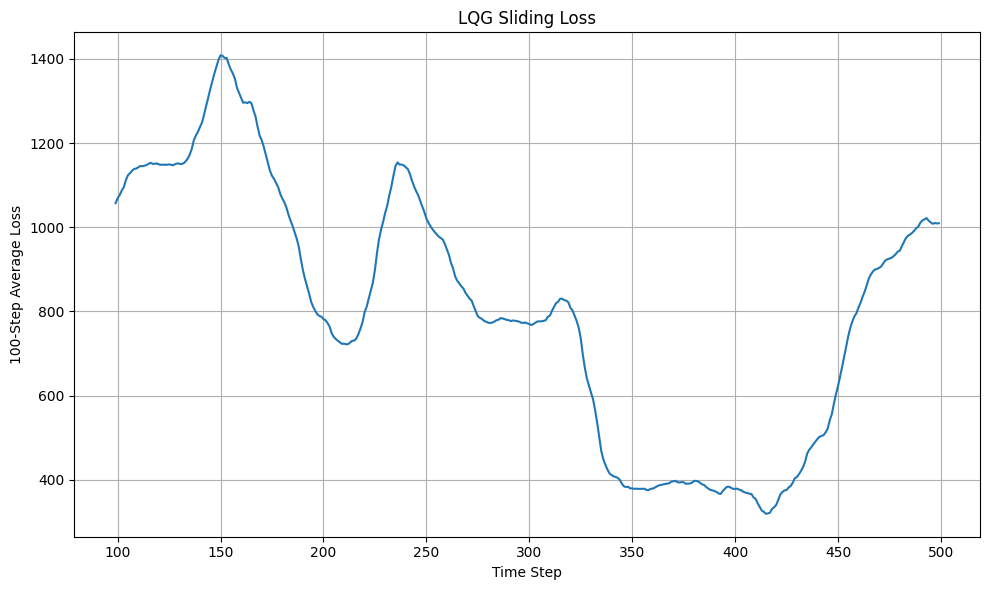

In [9]:
plot_loss_sliding(lqg_po, "LQG Sliding Loss", window_size=100)

In [ ]:
# GRC PO Experiments 

# Define system parameters
d, n = 10, 4  # Example dimensions
# A = make_diagonalizable_matrix(d)
# C = make_diagonalizable_matrix(d) 
# B = np.random.randn(d, n)
# Q = make_positive_semidefinite(d) 
# R = make_positive_semidefinite(n)


# Base dimensions
# dx_base, du_base = 2, 1
# blocks = 5  # So final dx = 2 * 5 = 10, du = 1 * 5 = 5

# # Define small system matrices
# A_small = np.array([[1.0, 1.0], [0.0, 1.0]])
# B_small = np.array([[0.0], [1.0]])
# Q_small = np.eye(dx_base)
# R_small = np.eye(du_base)

# # Create block-diagonal matrices
# A = block_diag(*([A_small] * blocks))     # Shape (10, 10)
# B = block_diag(*([B_small] * blocks))     # Shape (10, 5)
# Q = block_diag(*([Q_small] * blocks))     # Shape (10, 10)
# R = block_diag(*([R_small] * blocks))     # Shape (5, 5)


# PARAMETERS
h = 5         # Number of eigenpairs
eta =  0.001  # Step size
T = 500


grc_po = GRC(A, B, C, Q, R, h, eta, T, name="GRC", nl=False)
grc_po_nl = GRC(A, B, C, Q, R, h, eta, T, name="GRC", nl=True)
# grc_po_stu = GRC_STU(A, B, C, Q, R, h, eta, T, name="GRC", nl=True)


# # GRC
start_time = time.time()
grc_po.run()
end_time = time.time()
print(f"GRC Model Runtime: {end_time - start_time:.4f} seconds")

start_time = time.time()
grc_po_nl.run()
end_time = time.time()
print(f"GRC NL Model Runtime: {end_time - start_time:.4f} seconds")

# start_time = time.time()
# grc_po_stu.run()
# end_time = time.time()
# print(f"GRC STU Model Runtime: {end_time - start_time:.4f} seconds")

# # OSC_NL
# start_time = time.time()
# osc_nl.run()
# end_time = time.time()
# print(f"OSC NL Model Runtime: {end_time - start_time:.4f} seconds")

# OSC_w_STU
# start_time = time.time()
# osc_wstu.run()
# end_time = time.time()
# print(f"OSC_w_STU Model Runtime: {end_time - start_time:.4f} seconds")

plot_loss(grc_po, "GRC Loss")
plot_loss(grc_po_nl, "GRC NL Loss")
# plot_loss(grc_po_stu, "GRC STU Loss")
# plot_loss(grc_po_new, "GRC new Loss")
# plot_loss(osc_nl, "OSC NL Loss")
# plot_loss(osc_wstu, "OSC STU Loss")

/home/sd0937/spectral_control/PO/GRC/grc.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("K", torch.tensor(lqr(A, B, Q, R), dtype=torch.float32))
/home/sd0937/.conda/envs/my_conda/lib/python3.12/site-packages/torch/autograd/graph.py:823: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /pytorch/aten/src/ATen/cuda/CublasHandlePool.cpp:180.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


GRC Model Runtime: 136.8768 seconds


: 

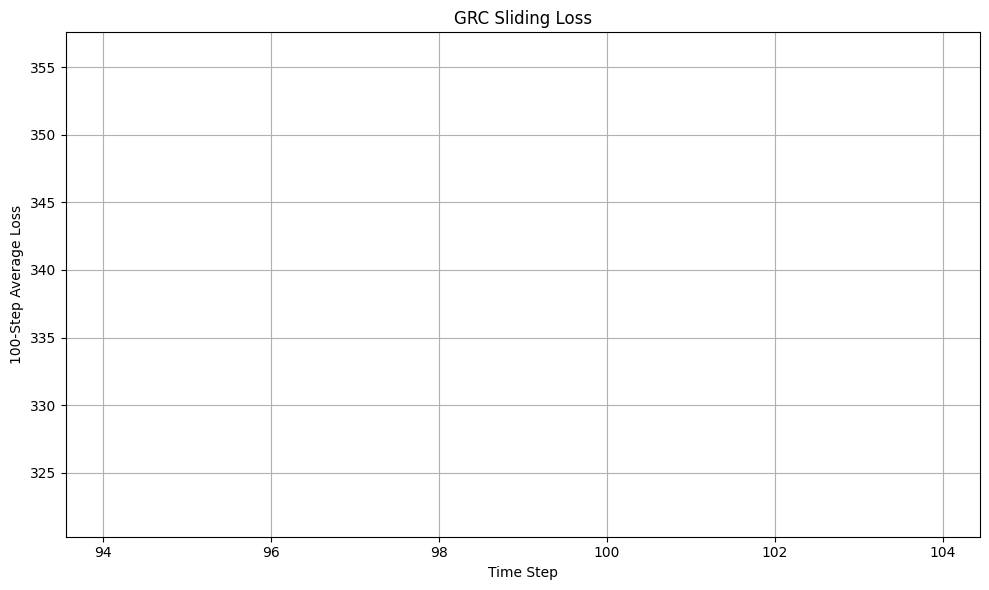

In [6]:
plot_loss_sliding(grc_po, "GRC Sliding Loss", window_size=100)

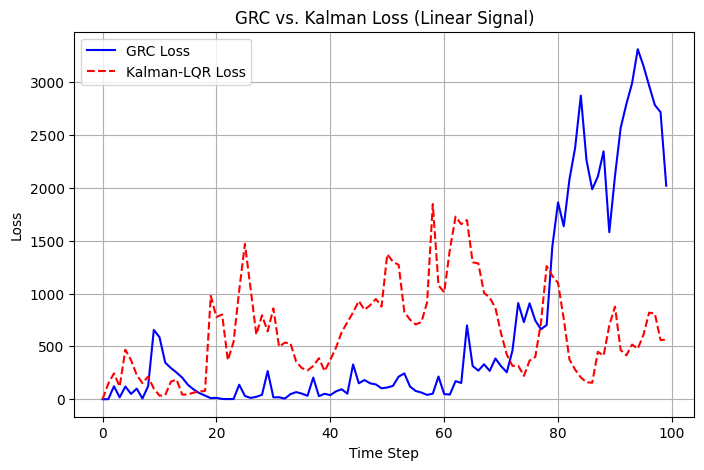

In [ ]:
compare_losses([grc_po, lqg_po], "GRC vs. LQG Loss (Linear Signal)")

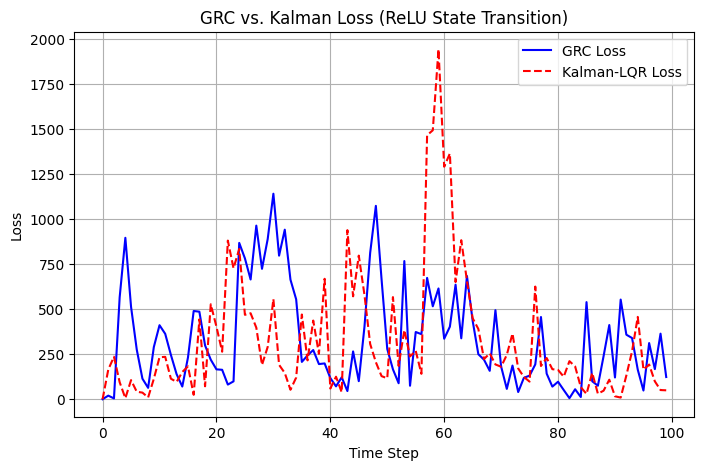

In [8]:
compare_losses([grc_po_nl, kalman_po_nl], "GRC vs. Kalman Loss (ReLU State Transition)")

In [ ]:
grc_losses = run_multiple_runs(GRC, num_runs=10, T=100, A=A, B=B, C=C , Q=Q, R=R, h=5, eta=0.001)
plot_runs_with_mean(grc_losses, "GRC Loss over 10 Runs")

: 

/home/sd0937/spectral_control/PO/DSC/dsc_PO.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("K", torch.tensor(lqr(A, B, Q, R), dtype=torch.float32))
/home/sd0937/.conda/envs/my_conda/lib/python3.12/site-packages/torch/autograd/graph.py:823: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /pytorch/aten/src/ATen/cuda/CublasHandlePool.cpp:180.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


DSC Model Runtime: 6.2913 seconds
DSC NL Model Runtime: 6.2297 seconds


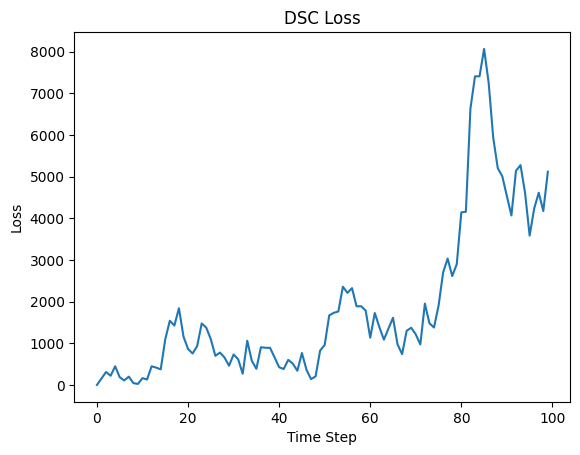

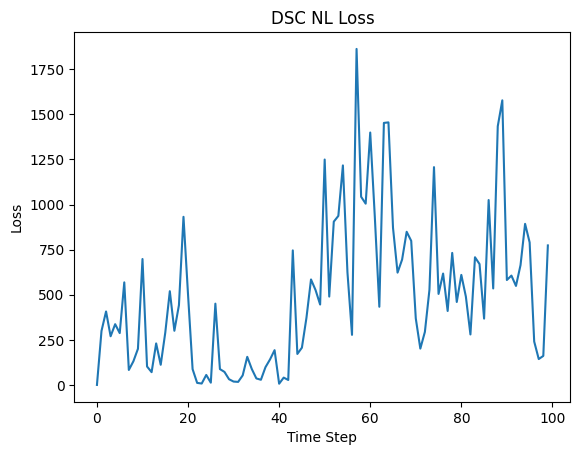

In [5]:
# DSC PO Experiments 

# Define system parameters
d, n = 10, 4  # Example dimensions



# PARAMETERS
h = 5         # Number of eigenpairs
H = h
m = 10      # order of log T (for the new Hankel Matrix) (only way I can achieve "going down" if this is large
M = m
gamma = 0.1 # should be very small (less than 2/3 for marginally stable systems) (check 0.2) for the GPC to be smoother
eta =  0.001  # Step size
T = 100


dsc_po = DSC_PO(A, B, C, Q, R, h, H, gamma, eta, T, name="DSC", nl=False)
dsc_po_nl = DSC_PO(A, B, C, Q, R, h, H, gamma, eta, T, name="DSC", nl=True)
# dsc_po_stu = DSC_PO_STU(A, B, C, Q, R, h, H, gamma, eta, T, name="DSC", nl=False)


# DSC
start_time = time.time()
dsc_po.run()
end_time = time.time()
print(f"DSC Model Runtime: {end_time - start_time:.4f} seconds")

start_time = time.time()
dsc_po_nl.run()
end_time = time.time()
print(f"DSC NL Model Runtime: {end_time - start_time:.4f} seconds")

# start_time = time.time()
# dsc_po_stu.run()
# end_time = time.time()
# print(f"DSC STU Model Runtime: {end_time - start_time:.4f} seconds")


# # OSC_NL
# start_time = time.time()
# osc_nl.run()
# end_time = time.time()
# print(f"OSC NL Model Runtime: {end_time - start_time:.4f} seconds")

# OSC_w_STU
# start_time = time.time()
# osc_wstu.run()
# end_time = time.time()
# print(f"OSC_w_STU Model Runtime: {end_time - start_time:.4f} seconds")

plot_loss(dsc_po, "DSC Loss")
plot_loss(dsc_po_nl, "DSC NL Loss")
# plot_loss(dsc_po_stu, "DSC STU Loss")
# plot_loss(dosc_po_old, "DOSC Old Loss")
# plot_loss(osc_nl, "OSC NL Loss")
# plot_loss(osc_wstu, "OSC STU Loss")

In [6]:
dsc_losses = run_multiple_runs(DSC_PO, num_runs=50, T=100, A=A, B=B, C=C , Q=Q, R=R, h=5, H =5 , gamma = 0.1, eta=0.001)
plot_runs_with_mean(dsc_losses, "DSC Loss over 50 Runs")

: 

In [ ]:
compare_losses([dsc_po, grc_po], "DSC vs. GRC Loss (Linear Signal)")

NameError: name 'dsc_po' is not defined

: 

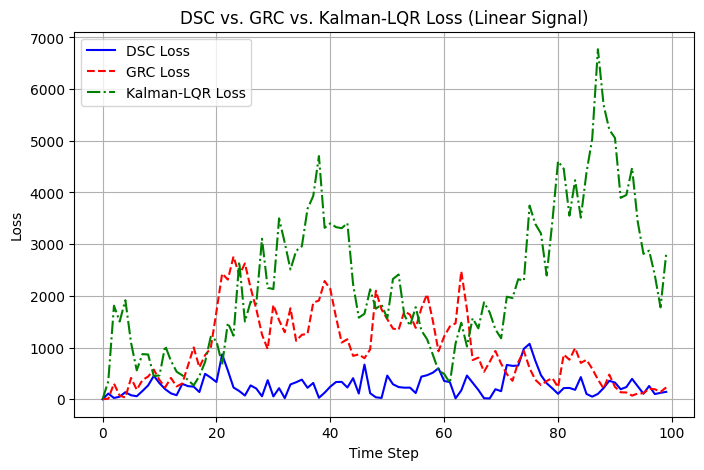

: 

In [ ]:
compare_losses([dsc_po, grc_po, kalman_po], "DSC vs. GRC vs. Kalman-LQR Loss (Linear Signal)", save_path="PO/figures/dsc_vs_gpc_vs_KF_loss4.png")


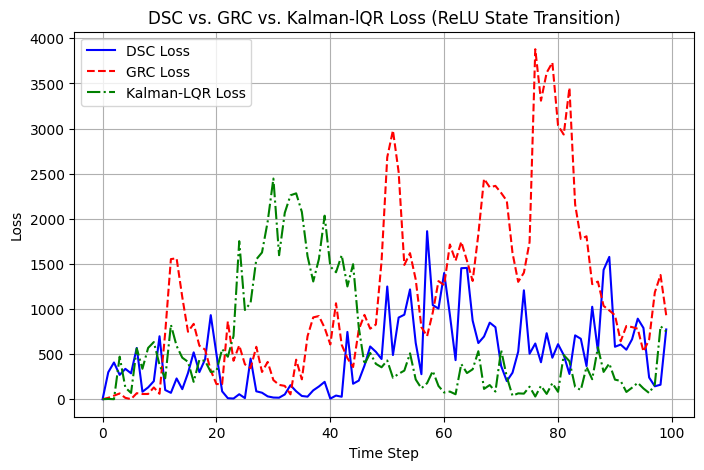

In [8]:
compare_losses([dsc_po_nl, grc_po_nl, kalman_po_nl], "DSC vs. GRC vs. Kalman-lQR Loss (ReLU State Transition)", save_path="PO/figures/dsc/dsc_vs_gpc_vs_KF_relu_gauss2.png")


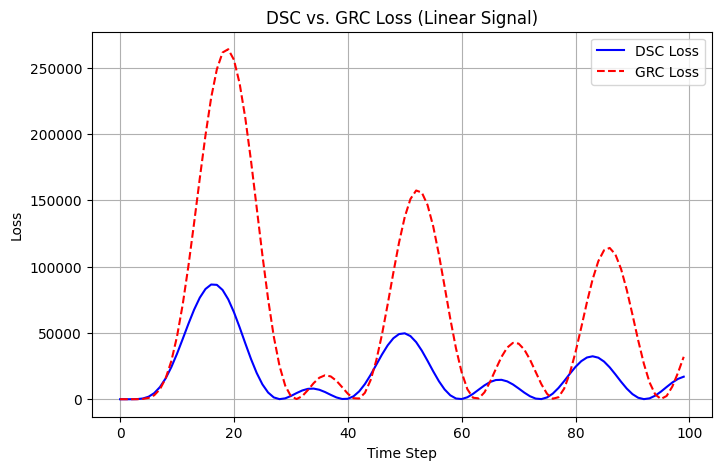

In [ ]:
compare_losses([dsc_po, grc_po], "DSC vs. GRC Loss (Linear Signal)", save_path="PO/figures/dsc_vs_gpc_loss.png")

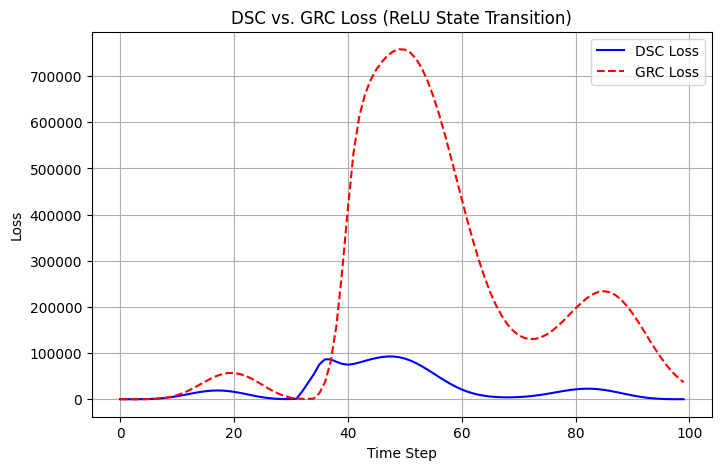

In [ ]:
compare_losses([dsc_po_nl, grc_po_nl], "DSC vs. GRC Loss (ReLU State Transition)", save_path="PO/figures/dsc_vs_gpc_loss_relu.png")